In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from patsy import dmatrices
import sklearn
import seaborn as sns

In [2]:
#Read and get the first five data in the dataset
dataframe=pd.read_csv("IBM Attrition Data.csv")
dataframe.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [3]:
#Get the attributes name
names = dataframe.columns.values 
names

array(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'], dtype=object)

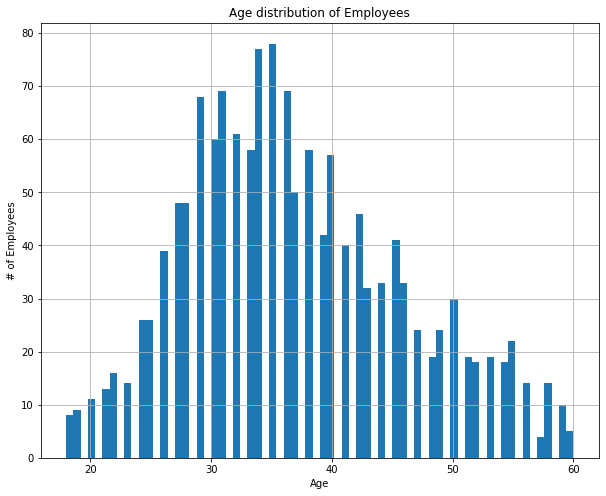

In [4]:
#Visualize the age by histogram
plt.figure(figsize=(10,8))
dataframe['Age'].hist(bins=70)
plt.title("Age distribution of Employees")
plt.xlabel("Age")
plt.ylabel("# of Employees")
plt.show()

Attrition
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

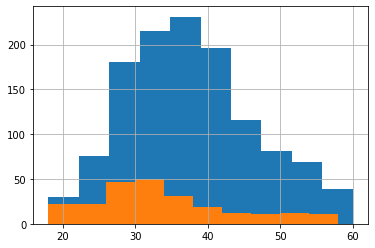

In [5]:
#Explore the data for Attrition by Age
dataframe.groupby('Attrition').Age.hist()

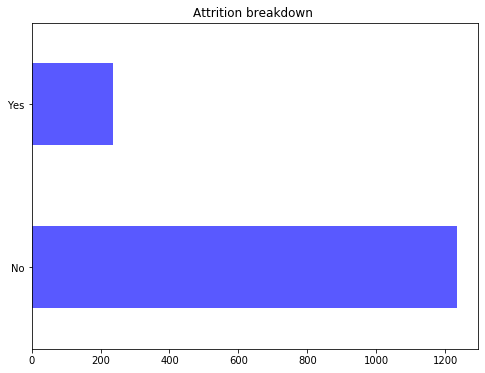

In [6]:
#Explore data for Left employees breakdown
plt.figure(figsize=(8,6))
dataframe.Attrition.value_counts().plot(kind='barh',color='blue',alpha=.65)
plt.title("Attrition breakdown ")
plt.show()

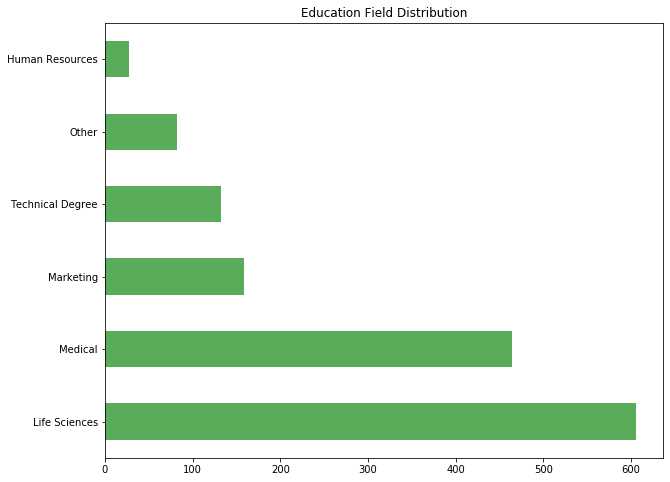

In [7]:
#Explore data for Education Field distribution
plt.figure(figsize=(10,8))
dataframe.EducationField.value_counts().plot(kind='barh',color='g',alpha=.65)
plt.title("Education Field Distribution")
plt.show()

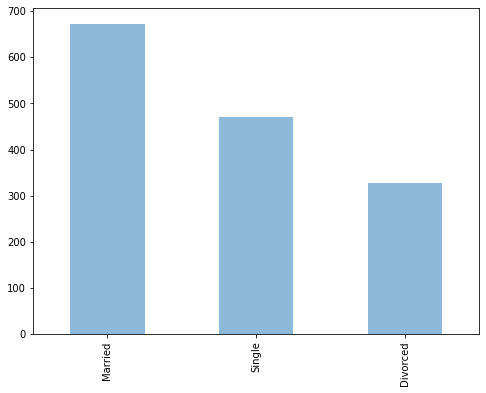

In [8]:
#Explore data for Marital Status
plt.figure(figsize=(8,6))
dataframe.MaritalStatus.value_counts().plot(kind='bar',alpha=.5)
plt.show()

In [9]:
#Get the statistic values of each attribute in the dataset
dataframe.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [10]:
#Understand the concise summary of the dataset
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [11]:
#Compute the standard deviation along all the axis
dataframe.std()

Age                           9.135373
DistanceFromHome              8.106864
Education                     1.024165
EnvironmentSatisfaction       1.093082
JobSatisfaction               1.102846
MonthlyIncome              4707.956783
NumCompaniesWorked            2.498009
WorkLifeBalance               0.706476
YearsAtCompany                6.126525
dtype: float64

In [12]:
#Count the Y/N of the attrition of the dataset
dataframe['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [13]:
#Get the data type of attrition attribute
dataframe['Attrition'].dtypes

dtype('O')

In [14]:
#Due to the previouse step, do label encoding
dataframe['Attrition'].replace('Yes',1, inplace=True)
dataframe['Attrition'].replace('No',0, inplace=True)

In [16]:
#Show the label encoding result by view the first 10th rows
dataframe.head(10)

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,0,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,1,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,0,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,0,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
5,32,0,Research & Development,2,2,Life Sciences,4,4,Single,3068,0,2,7
6,59,0,Research & Development,3,3,Medical,3,1,Married,2670,4,2,1
7,30,0,Research & Development,24,1,Life Sciences,4,3,Divorced,2693,1,3,1
8,38,0,Research & Development,23,3,Life Sciences,4,3,Single,9526,0,3,9
9,36,0,Research & Development,27,3,Medical,3,3,Married,5237,6,2,7


In [18]:
#Building up a logistic regression model
#Get the attrition as the label of the model
X = dataframe.drop(['Attrition'],axis=1)
X.head()

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [19]:
Y = dataframe['Attrition']
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [31]:
#Do label encoding for the education feild
X['EducationField'].replace('Life Sciences',1, inplace=True)
X['EducationField'].replace('Medical',2, inplace=True)
X['EducationField'].replace('Marketing', 3, inplace=True)
X['EducationField'].replace('Other',4, inplace=True)
X['EducationField'].replace('Technical Degree',5, inplace=True)
X['EducationField'].replace('Human Resources', 6, inplace=True)

In [32]:
X['EducationField'].value_counts()

1    606
2    464
3    159
5    132
4     82
6     27
Name: EducationField, dtype: int64

In [33]:
X['Department'].replace('Research & Development',1, inplace=True)
X['Department'].replace('Sales',2, inplace=True)
X['Department'].replace('Human Resources', 3, inplace=True)

In [34]:
X['Department'].value_counts()

1    961
2    446
3     63
Name: Department, dtype: int64

In [35]:
X['MaritalStatus'].replace('Married',1, inplace=True)
X['MaritalStatus'].replace('Single',2, inplace=True)
X['MaritalStatus'].replace('Divorced',3, inplace=True)

In [36]:
X['MaritalStatus'].value_counts()

1    673
2    470
3    327
Name: MaritalStatus, dtype: int64

In [37]:
x=X.select_dtypes(include=['int64'])
x.dtypes

Age                        int64
Department                 int64
DistanceFromHome           int64
Education                  int64
EducationField             int64
EnvironmentSatisfaction    int64
JobSatisfaction            int64
MaritalStatus              int64
MonthlyIncome              int64
NumCompaniesWorked         int64
WorkLifeBalance            int64
YearsAtCompany             int64
dtype: object

In [38]:
Y, x = dmatrices('Attrition ~ Age + Department + \
                  DistanceFromHome + Education + EducationField + YearsAtCompany',
                  dataframe, return_type="dataframe")
print (x.columns)

Index(['Intercept', 'Age', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'YearsAtCompany'],
      dtype='object')


In [39]:
#Change the diemention into flattened array
y = np.ravel(Y)

In [41]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model = model.fit(x, y)

# check the accuracy on the training set
model.score(x, y)*100

84.08163265306122

In [42]:
y.mean()

0.16122448979591836

In [43]:
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y, test_size=0.3, random_state=0)
model2=LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
predicted= model2.predict(X_test)

In [45]:
probs = model2.predict_proba(X_test)

In [51]:
from sklearn import metrics

print (metrics.accuracy_score(y_test, predicted)*100)
#Get the probabilities of target=1
print (metrics.roc_auc_score(y_test, probs[:, 1])*100)

84.35374149659864
65.02502887947632


In [48]:
print (metrics.confusion_matrix(y_test, predicted))

[[371   0]
 [ 69   1]]


In [49]:
print (metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       371
         1.0       1.00      0.01      0.03        70

    accuracy                           0.84       441
   macro avg       0.92      0.51      0.47       441
weighted avg       0.87      0.84      0.77       441



In [50]:
#add random values to KK according to the parameters mentioned above to check the proabily of attrition of the employee
kk=[[1.0, 23.0, 1.0, 500.0, 3.0, 24.0, 1.0]]
print(model.predict_proba(kk))

[[6.25571966e-07 9.99999374e-01]]
